## Kaggle Competition for House Prices: Advanced Regression Techniques

In [35]:
#import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Check the train dataset

In [36]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Missing data inspection

Text(0.5, 1.0, 'TEST')

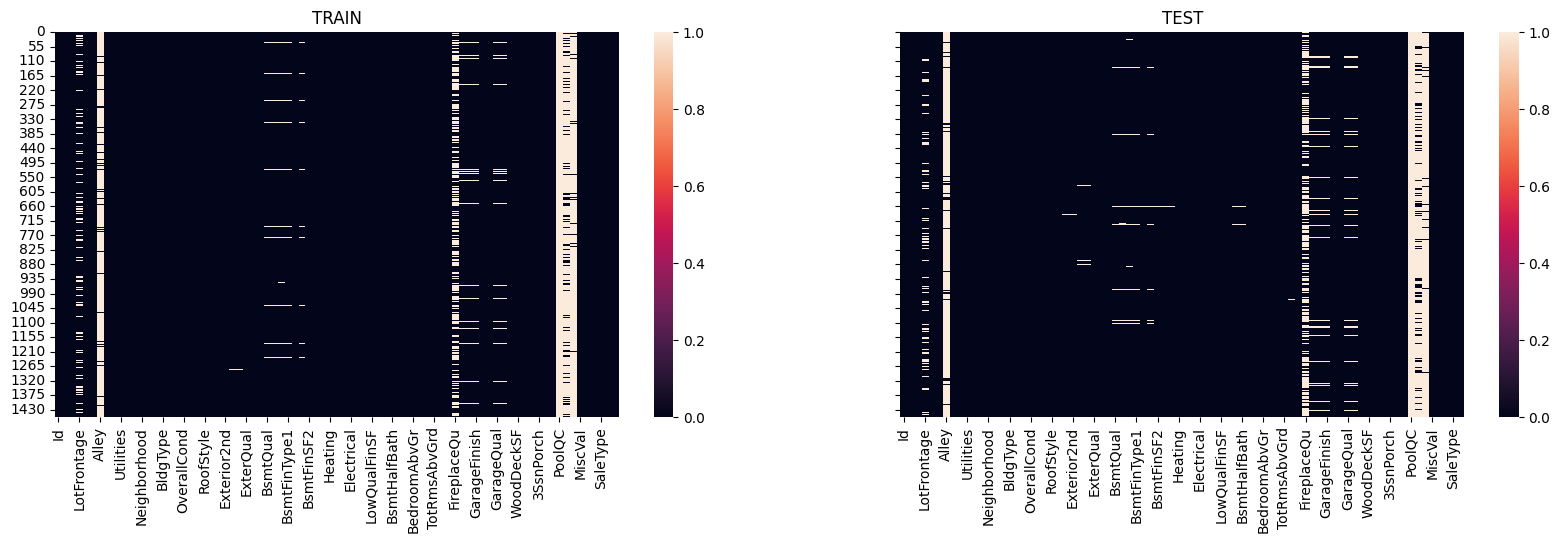

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

sns.heatmap(train.isnull(), ax=axes[0])
axes[0].set_title('TRAIN')

sns.heatmap(test.isnull(), ax=axes[1])
axes[1].set_title('TEST')

In [38]:
test.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
dtype: int64

In [39]:
train.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

As we see many missing data in some features of training and test sets, lets inspect all columns for amount of missing data and its own dtype and then decide what to do with that data. Now lets check which fetures of training and testing sets have missing data.

In [40]:
#function cheak a feature of training and testing sets and output an amount of missing data, data type and 'value_count'(if dtype == 'object')
def CheckFunction(feature):
    print(str(feature))

    print('   TRAINING_SET')
    print('      NULLs(', train[[feature]].squeeze().isnull().sum(), '/1460)')
    if str(train[[feature]].squeeze().dtype) == 'object':
        print("      dtype: 'oblect'")
        print('      Value_counts:  ', train[[feature]].value_counts().sort_values(ascending=False))
    else: print('      dtype: ', train[[feature]].squeeze().dtype)


    print('   TESTING_SET')
    print('      NULLs(', test[[feature]].squeeze().isnull().sum(), '/1459)')
    if str(test[[feature]].squeeze().dtype) == 'object':
        print("      dtype: 'oblect'")
        print('      Value_counts:  ', test[[feature]].value_counts().sort_values(ascending=False))
    else: print('      dtype: ', test[[feature]].squeeze().dtype)

### Data preparation
##### N/A data cleaning

In [49]:
#PoolQC: Pool quality 1453
		
       #Ex	Excellent
       #Gd	Good
       #TA	Average/Typical
       #Fa	Fair
       #NA	No Pool
#As most of properties have no pool then we will use only exsiting(1) or not existing(0) of the pool.
train['PoolQC'] = train['PoolQC'].fillna(0)
train['PoolQC'] = train['PoolQC'].replace('Ex', 1)
train['PoolQC'] = train['PoolQC'].replace('Gd', 1)
train['PoolQC'] = train['PoolQC'].replace('TA', 1)
train['PoolQC'] = train['PoolQC'].replace('Fa', 1)


#MiscFeature: feature not covered in other categories 1406
		
       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
#As most of properties have no extra feature, so no extrfeature - 0 and if yes - 1
train['MiscFeature'] = train['MiscFeature'].fillna(0)
train['MiscFeature'] = train['MiscFeature'].replace('Elev', 1)
train['MiscFeature'] = train['MiscFeature'].replace('Gar2', 1)
train['MiscFeature'] = train['MiscFeature'].replace('Othr', 1)
train['MiscFeature'] = train['MiscFeature'].replace('TenC', 1)
train['MiscFeature'] = train['MiscFeature'].replace('Shed', 1)


#Alley: Type of alley access to property 1369

       #Grvl	Gravel
       #Pave	Paved
       #NA 	No alley access
# we do the same thing
train['Alley'] = train['Alley'].fillna(0)
train['Alley'] = train['Alley'].replace('Grvl', 1)
train['Alley'] = train['Alley'].replace('Pave', 1)


#Fence: Fence quality 1179
		
       #GdPrv	Good Privacy-          4
       #MnPrv	Minimum Privacy-       3
       #GdWo	Good Wood-             2
       #MnWw	Minimum Wood/Wire-     1
       #NA	No Fence-              0
train['Fence'] = train['Fence'].fillna(0)
train['Fence'] = train['Fence'].replace('MnWw', 1)
train['Fence'] = train['Fence'].replace('GdWo', 2)
train['Fence'] = train['Fence'].replace('MnPrv', 3)
train['Fence'] = train['Fence'].replace('GdPrv', 4)


#FireplaceQu: Fireplace quality 690

       #Ex	Excellent - Exceptional Masonry Fireplace                 5
       #Gd	Good - Masonry Fireplace in main level                    4
       #TA	Average - Prefabricated Fireplace in main                 3
       # living area or Masonry Fireplace in basement                 
       #Fa	Fair - Prefabricated Fireplace in basement                2
       #Po	Poor - Ben Franklin Stove                                 1
       #NA	No Fireplace                                              0   
train['FireplaceQu'] = train['FireplaceQu'].fillna(0)
train['FireplaceQu'] = train['FireplaceQu'].replace('Po', 1)
train['FireplaceQu'] = train['FireplaceQu'].replace('Fa', 2)
train['FireplaceQu'] = train['FireplaceQu'].replace('TA', 3)
train['FireplaceQu'] = train['FireplaceQu'].replace('Gd', 4)
train['FireplaceQu'] = train['FireplaceQu'].replace('Ex', 5)


#LotFrontage: Linear feet of street connected to property (mean) 259
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())


#GarageYrBlt: Year garage was built                       (mean) 81
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train.LotFrontage.mean())


#GarageCond: Garage condition 81

       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
train['GarageCond'] = train['GarageCond'].fillna(0)
train['GarageCond'] = train['GarageCond'].replace('Po', 1)
train['GarageCond'] = train['GarageCond'].replace('Fa', 2)
train['GarageCond'] = train['GarageCond'].replace('TA', 3)
train['GarageCond'] = train['GarageCond'].replace('Gd', 4)
train['GarageCond'] = train['GarageCond'].replace('Ex', 5)


#GarageType: Garage location 81
		
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage
train['GarageType'] = train['GarageType'].fillna(0)
train['GarageType'] = train['GarageType'].replace('2Types', 1)
train['GarageType'] = train['GarageType'].replace('Attchd', 1)
train['GarageType'] = train['GarageType'].replace('Basment', 1)
train['GarageType'] = train['GarageType'].replace('BuiltIn', 1)
train['GarageType'] = train['GarageType'].replace('CarPort', 1)
train['GarageType'] = train['GarageType'].replace('Detchd', 1)


#GarageFinish: Interior finish of the garage 81

      #Fin	Finished
      #RFn	Rough Finished	
      #Unf	Unfinished
      #NA	No Garage
train['GarageFinish'] = train['GarageFinish'].fillna(0)
train['GarageFinish'] = train['GarageFinish'].replace('Unfinished', 1)
train['GarageFinish'] = train['GarageFinish'].replace('Rough Finished', 2)
train['GarageFinish'] = train['GarageFinish'].replace('Finished', 3)


#GarageQual: Garage quality

       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
train['GarageQual'] = train['GarageType'].fillna(0)
train['GarageType'] = train['GarageType'].replace('Po', 1)
train['GarageType'] = train['GarageType'].replace('FA', 1)
train['GarageType'] = train['GarageType'].replace('TA', 2)
train['GarageType'] = train['GarageType'].replace('Gd', 2)
train['GarageType'] = train['GarageType'].replace('Ex', 3)


#BsmtFinType2: Rating of basement finished area (if multiple types)

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basemen
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(0)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('Unf', 1)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('LwQ', 1)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('Rec', 2)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('BLQ', 2)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('ALQ', 3)
train['BsmtFinType2'] = train['BsmtFinType2'].replace('GLQ', 4)


#BsmtExposure: Refers to walkout or garden level walls   38

       #Gd	Good Exposure
       #Av	Average Exposure (split levels or foyers typically score average or above)	
       #Mn	Mimimum Exposure
       #No	No Exposure
       #NA	No Basement
train['BsmtExposure'] = train['BsmtExposure'].fillna(0)
train['BsmtExposure'] = train['BsmtExposure'].replace('No', 0)
train['BsmtExposure'] = train['BsmtExposure'].replace('Mn', 1)
train['BsmtExposure'] = train['BsmtExposure'].replace('Av', 2)
train['BsmtExposure'] = train['BsmtExposure'].replace('Gd', 3)


#BsmtQual: Evaluates the height of the basement 37

       #Ex	Excellent (100+ inches)	
       #Gd	Good (90-99 inches)
       #TA	Typical (80-89 inches)
       #Fa	Fair (70-79 inches)
       #Po	Poor (<70 inches
       #NA	No Basement
train['BsmtQual'] = train['BsmtQual'].fillna(0)
train['BsmtQual'] = train['BsmtQual'].replace('Po', 1)
train['BsmtQual'] = train['BsmtQual'].replace('Fa', 1)
train['BsmtQual'] = train['BsmtQual'].replace('TA', 2)
train['BsmtQual'] = train['BsmtQual'].replace('Gd', 3)
train['BsmtQual'] = train['BsmtQual'].replace('Ex', 4)


#BsmtCond: Evaluates the general condition of the basement 37

       #Ex	Excellent
       #Gd	Good
       #TA	Typical - slight dampness allowed
       #Fa	Fair - dampness or some cracking or settling
       #Po	Poor - Severe cracking, settling, or wetness
       #NA	No Basement
train['BsmtCond'] = train['BsmtCond'].fillna(0)
train['BsmtCond'] = train['BsmtCond'].replace('Po', 1)
train['BsmtCond'] = train['BsmtCond'].replace('Fa', 2)
train['BsmtCond'] = train['BsmtCond'].replace('TA', 3)
train['BsmtCond'] = train['BsmtCond'].replace('Gd', 4)
train['BsmtCond'] = train['BsmtCond'].replace('Ex', 5)


#BsmtFinType1: Rating of basement finished area 37

       #GLQ	Good Living Quarters
       #ALQ	Average Living Quarters
       #BLQ	Below Average Living Quarters	
       #Rec	Average Rec Room
       #LwQ	Low Quality
       #Unf	Unfinshed
       #NA	No Basement
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(0)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('Unf', 1)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('LwQ', 2)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('Rec', 3)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('BLQ', 4)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('ALQ', 5)
train['BsmtFinType1'] = train['BsmtFinType1'].replace('GLQ', 6)


#MasVnrArea: Masonry veneer area in square feet           (mean) 8 
train['MasVnrArea'] = train['MasVnrArea'].fillna(train.MasVnrArea.mean())


#MasVnrType: Masonry veneer type

       #BrkCmn	Brick Common
       #BrkFace	Brick Face
       #CBlock	Cinder Block
       #None	       None
       #Stone	       Stone
train['MasVnrType'] = train['MasVnrType'].fillna(0)
train['MasVnrType'] = train['MasVnrType'].replace('CBlock', 1)
train['MasVnrType'] = train['MasVnrType'].replace('BrkFace', 1)
train['MasVnrType'] = train['MasVnrType'].replace('BrkCmn', 1)
train['MasVnrType'] = train['MasVnrType'].replace('Stone', 1)


#Electrical: Electrical system 1

       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode())
train['Electrical'] = train['Electrical'].replace('FuseP', 0)
train['Electrical'] = train['Electrical'].replace('FuzeF', 1)
train['Electrical'] = train['Electrical'].replace('FuzeA', 2)
train['Electrical'] = train['Electrical'].replace('SBrkr', 3)
train['Electrical'] = train['Electrical'].replace('Mix', 4)

Lets see how training set was changed

<AxesSubplot:>

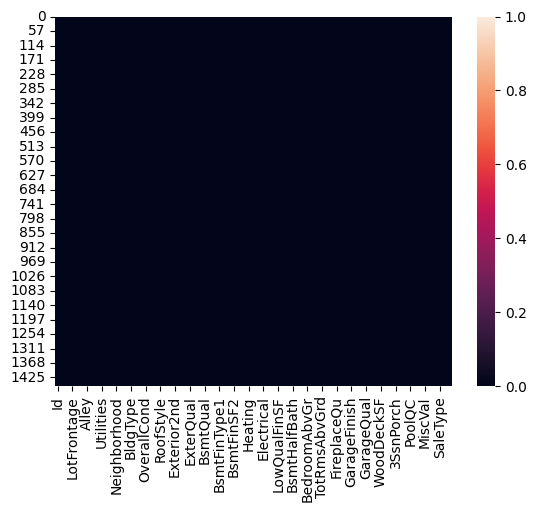

In [51]:

sns.heatmap(train.isnull())

As we see there are no null values left